In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pychow import ChowTest
#HOla iam juan 222

In [11]:
data = pd.read_csv('./Tasa_de_Cambio_Representativa_del_Mercado-_TRM.csv')
data.head()

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,4100.66,COP,15/02/2025,18/02/2025
1,4161.46,COP,14/02/2025,14/02/2025
2,4165.07,COP,13/02/2025,13/02/2025
3,4153.80,COP,12/02/2025,12/02/2025
4,4132.93,COP,11/02/2025,11/02/2025


In [12]:
data.index = pd.to_datetime((data['VIGENCIADESDE']), format='%d/%m/%Y')
data.sort_index(ascending=True, inplace=True)
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
VIGENCIADESDE,,,,
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991
1991-12-12,633.09,COP,12/12/1991,12/12/1991


In [13]:
fill_dates = pd.date_range(min(data.index), max(data.index))
data = data.reindex(fill_dates)
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-08,NaN,NaN,NaN,NaN
1991-12-09,NaN,NaN,NaN,NaN
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991


In [14]:
data.ffill(inplace=True)
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-08,638.06,COP,07/12/1991,09/12/1991
1991-12-09,638.06,COP,07/12/1991,09/12/1991
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991


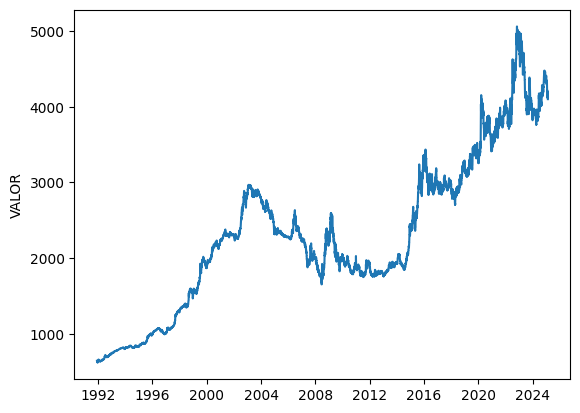

In [19]:
sns.lineplot(data['VALOR']);

In [25]:
trm = data[['VALOR']]
trm.loc[:,'POSICION'] = np.arange(1, trm.shape[0]+1)
trm.head()

/tmp/ipykernel_51886/1961056676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm.loc[:,'POSICION'] = np.arange(1, trm.shape[0]+1)


,VALOR,POSICION
1991-12-02,643.42,1
1991-12-03,639.22,2
1991-12-04,635.70,3
1991-12-05,631.51,4
1991-12-06,627.16,5


<Axes: ylabel='VALOR'>

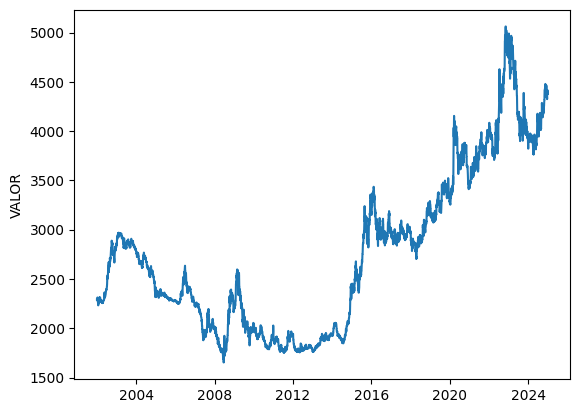

In [17]:
sns.lineplot(trm['VALOR'])

In [18]:
ChowTest.chow_test(trm, 6000, 'VALOR', ['POSICION'])

{'Chow Test Statistic': np.float64(4254.644111665241),
 'P-value': np.float64(1.1102230246251565e-16)}